# MINI PROJECT


To find the preferred genre of a a given user, based on the ratings given to a set of movies that the particular user has seen. Classify the preferred genres of that particular user. This can help in suggesting movies to the user, which the user may prefer to watch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot

In [2]:
#importing the csv files
movies = pd.read_csv('movies.csv', sep = ',')
ratings = pd.read_csv('ratings.csv', sep = ',')

Getting the userid input from the user

In [19]:
userid = int(input('Enter the userid: '))

Enter the userid: 578


In [4]:
#deleting timestamp as its not necessary as of now
del ratings['timestamp']

In [20]:
#filtering the ratings based on required userId
filterid = ratings[ratings['userId'] == userid]

In [21]:
#filtering the desired userId based on ratings >= 3.5 out of 5
filterrate = filterid[filterid['rating'] >= 3.5]

In [22]:
#Merging the movie title with the ratings df
dfuid = filterrate.merge(movies, on = 'movieId', how = 'inner')

In [23]:
sp = movies['genres'].str.split('|')#to list all the genres available
L = np.array(sp.values.tolist()).ravel().tolist() #to convert into list of lists of 1D array
all_genre = set(sum(L,[])) #to combine the lists into a single list. The set operation returns only the unique values of the list.

In [24]:
#to find the genres specific only to the required userId
temp = dfuid.genres.str.split("|").tolist() # this will return a list of lists for all the genres

import functools
import operator

unique_genres = set(functools.reduce(operator.concat, temp)) #this will flatten the list of lists and ultimately call the set to get the unique genres. Use len to get the number of unique genres afterwards

In [25]:
genre_df = pd.DataFrame(unique_genres, columns = ['Genre']) #to store the unique genres in a df

In [26]:
tempgen = sum(temp,[]) #to obtain a list of all the genres of the movies watched by the user(has repetition)

In [27]:
#to obtain a count of the different unique genres, which is stored as a list in countgen
countgen = []
for i in unique_genres:
    countgen.append(tempgen.count(i))

In [28]:
countgen = pd.DataFrame(countgen, columns = ['Count']) #countgen; list --> datafram

In [29]:
newdf = pd.concat([genre_df, countgen], axis = 1, join = 'inner') #joining the 2 dataframes for final analysis

In [30]:
var = max(newdf['Count']) #max viewed genre count
ind = newdf[newdf['Count'] == var].index #returns the index for var

In [31]:
#to find the most preferred genre of the user
percent = 0.2*var #to find movies within a 20% margin from the most viewed genre
range_gen = var - percent
pref = newdf[newdf['Count']>= (range_gen)]

In [32]:
#Obtaining the corresponding preferred genres
t = pref['Genre'].tolist()
#t = newdf.iloc[ind]
#fin_gen = t['Genre'].tolist()
fin_gen = ', '.join(t) #converts list to string

In [33]:
print('The most preferred genres of user', userid, 'is/are:', fin_gen) #prints the final conclusion of this project.

The most preferred genres of user 578 is/are: Comedy


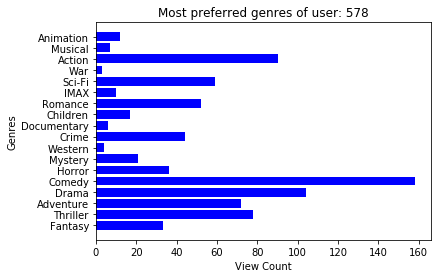

In [40]:
#to plot a graph between the genres and their view count
import matplotlib.pyplot as plt 

x = newdf['Count'].values
y = newdf['Genre'].values

plt.ylabel('Genres')
plt.xlabel('View Count')

plt.title('Most preferred genres of user: %s' %userid)

plt.barh(y,x, color = 'blue') #gives a horizontal plot
plt.show()

In [35]:
idlist = dfuid['movieId'].tolist() #to list the movies that the user has watched.

In [36]:
mov = movies[~movies.movieId.isin(idlist)] #to obtain a df of the list of movies that the user has not watched

In [37]:
mov_not = mov[mov.genres.isin(t)] #to list the movies not watched under preferred genre

In [38]:
mov_not.reset_index(drop=True, inplace = True)#to reset the index

In [39]:
print('The movies recommended to user', userid, ' are the following:')
mov_not.head()

The movies recommended to user 578  are the following:


,movieId,title,genres
0,18,Four Rooms (1995),Comedy
1,19,Ace Ventura: When Nature Calls (1995),Comedy
2,65,Bio-Dome (1996),Comedy
3,69,Friday (1995),Comedy
4,88,Black Sheep (1996),Comedy
